# 256 QAM DSP ML SVM

In [31]:
%pylab inline
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd QAM8bit/

[WinError 2] The system cannot find the file specified: 'QAM8bit/'
C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion\QAM8bit


## Load  Data

In [17]:
data = loadtxt('8bOutRx_DualPolOSNR20R8.txt',delimiter=';')
Code=loadtxt('PBRSout.txt',skiprows=5)

# Functions

In [18]:
def NormData(DataSet,data):
    for i in range(len(data[:,0])):
        DataSet[i,0]=data[:,0][i]
        DataSet[i,1]=data[:,1][i]
    DataSet[:,0]=DataSet[:,0]/max(DataSet[:,0])
    DataSet[:,1]=DataSet[:,1]/max(DataSet[:,1])

In [19]:
def ColorMap(Word,Map,M):
    Cmap=arange(M)
    for i in range(len(Word)):
        for j in range(len(Cmap)):
            if(Word[i]==Org[j]):
                Map[i]=Cmap[j]

In [20]:
def BER(x,y):
    j=0
    for i in range(len(x)):
        if(x[i]!=y[i]):
            j+=1
    return(j/len(x))
            

## Training data 

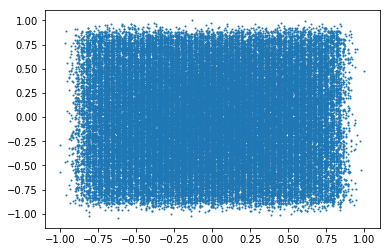

In [21]:
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),s=1)

### Simple splice DSP

In [22]:
done=data[1::2][:]
shape(done)

(32768, 4)

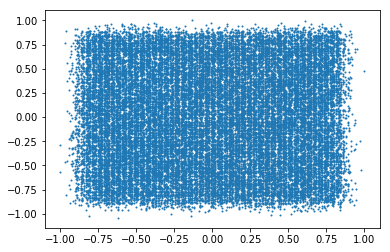

In [23]:
data=done
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),s=1)

## PBRS reformating

### Retrive PBRS creat Classification vector 

In [24]:
INT=[]
for i in range(int(len(Code)/8)):
    INT.append(i*8)
CodeWord=[]
for i in range(len(Code)):
    CodeWord.append(str(int(Code[i])))

Word=[]
Org=[]
j=0
for i in INT:
    Word.append(CodeWord[i]+CodeWord[i+1]+CodeWord[i+2]+CodeWord[i+3]+CodeWord[i+4]+CodeWord[i+5]+CodeWord[i+6]+CodeWord[i+7])
    
    if((Word[j] in Org)==False ):
        Org.append(Word[j])
    j=j+1

In [25]:
len(Org)

256

In [26]:
Map=zeros(len(Word))
ColorMap(Word,Map,256)

## Complete Incoming Data

In [27]:
#Normalize IQ data after splice
DataSet=zeros((len(data[:,0]),2))
NormData(DataSet,data)

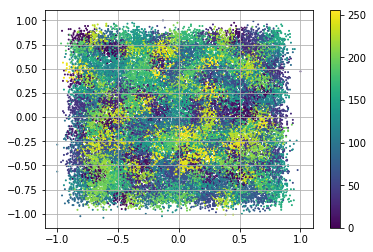

In [28]:
scatter(DataSet[:,0],DataSet[:,1],c=Map,s=1)
colorbar()
grid(True)

## ML training SVM

In [29]:
X_train, X_test, y_train, y_test = train_test_split(DataSet, Map, test_size = 0.20)

In [32]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=-1, error_score=0)
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}

Grid scores on development set:

0.000 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.000 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.001 (+/-0.001) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.000 (+/-0.000) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.046 (+/-0.004) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.001}
0.001 (+/-0.001) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.0001}
0.447 (+/-0.015) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
0.046 (+/-0.004) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.0001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.50      0.32      0.39        28
        1.0       0.42      0.42      0.42        24
        2.0     

In [33]:
svclassifier = SVC(kernel='rbf',C=1000,gamma=0.001)
svclassifier.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing data set

dataTest=dataTest[1::2][:]

DataSetTest=zeros((len(dataTest[:,0]),2))
NormData(DataSetTest,dataTest)

CodeWordT=[]
for i in range(len(CodeTest)):
    CodeWordT.append(str(int(CodeTest[i])))
WordT=[]
for i in INT:
    WordT.append(CodeWordT[i]+CodeWordT[i+1]+CodeWordT[i+2]+CodeWordT[i+3])

MapT=zeros(len(WordT))
ColorMap(WordT,MapT,16)

scatter(dataTest[:,0]/max(dataTest[:,0]),dataTest[:,1]/max(dataTest[:,1]),c=MapT,s=1)
colorbar()
grid(True)

## Predict on data

In [34]:
y_prediction= svclassifier.predict(X_test)

In [37]:
print(classification_report(y_test,y_prediction))

             precision    recall  f1-score   support

        0.0       0.50      0.32      0.39        28
        1.0       0.42      0.42      0.42        24
        2.0       0.38      0.40      0.39        15
        3.0       0.61      0.31      0.42        35
        4.0       0.35      0.48      0.41        27
        5.0       0.44      0.63      0.52        27
        6.0       0.50      0.22      0.31        18
        7.0       0.76      0.55      0.64        29
        8.0       0.89      0.46      0.60        35
        9.0       0.50      0.36      0.42        33
       10.0       0.19      0.35      0.25        17
       11.0       0.31      0.61      0.41        18
       12.0       0.33      0.35      0.34        20
       13.0       0.65      0.48      0.55        27
       14.0       0.41      0.40      0.41        30
       15.0       0.77      0.42      0.54        24
       16.0       0.53      0.50      0.52        32
       17.0       0.69      0.32      0.44   

In [38]:
BER(y_test,y_prediction)

0.5704913030210559

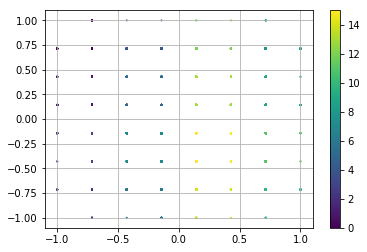

In [19]:
scatter(X_test[:,0],X_test[:,1],c=y_prediction,s=1)
colorbar()
grid(True)